In [16]:
import pydicom
from spacetransformer import Space, warp_point
from spacetransformer.torch import warp_image
from matplotlib import pyplot as plt

In [9]:
ds = pydicom.dcmread('./sample_1/I50')

In [31]:
img = ds.pixel_array[None] + float(ds.RescaleIntercept)
space = Space(shape=(1, 512, 512), 
              spacing=(1, ds.PixelSpacing[0],ds.PixelSpacing[1]),
              origin=ds.ImagePositionPatient,
              x_orientation=(0,0,1),
              y_orientation=ds.ImageOrientationPatient[3:6],
              z_orientation=ds.ImageOrientationPatient[0:3])

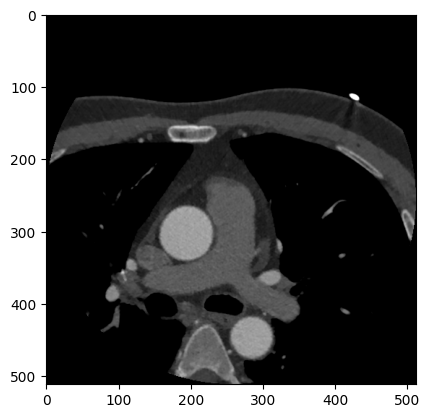

In [32]:
plt.figure()
plt.imshow(img[0], vmin=-200, vmax=700, cmap='gray')
plt.show()

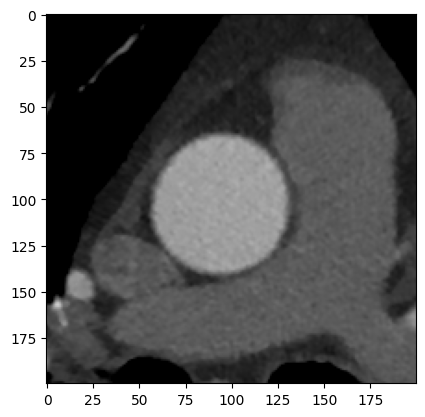

In [ ]:
crop_space = space.apply_bbox([[0,1], [200, 400],[100,300]]).apply_shape([1, 60,60],)
crop_image = warp_image(img, space, crop_space, mode='trilinear', pad_mode='constant', pad_value=0)
plt.figure()
plt.imshow(crop_image[0], vmin=-200, vmax=700, cmap='gray')
plt.show()

In [ ]:
slice_space = image.space.apply_bbox([])